In [24]:
import pickle
import random

X_train_dict = pickle.load(open('X_train.pickle','rb'))
X_test_dict = pickle.load(open('X_test.pickle','rb'))
y_train_dict = pickle.load(open('y_train.pickle','rb'))
y_test_dict = pickle.load(open('y_test.pickle','rb'))
#get data into long lists of jokes

In [25]:
#shuffle list bc can only use like 4000 examples
temp = list(zip(X_train_dict, y_train_dict)) 
random.shuffle(temp) 
res1, res2 = zip(*temp) 

In [2]:
import torch
from transformers import AutoModel, AutoTokenizer, BertTokenizer
torch.set_grad_enabled(False)
import numpy as np
import pandas as pd
import torch
import transformers as ppb # pytorch transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
# Load pretrained model/tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [43]:
#tokenizing dataset
padded=tokenizer(res1[:1000], add_special_tokens=True, padding=True)['input_ids']

In [44]:
input_ids = torch.tensor(np.array(padded))

with torch.no_grad():
    last_hidden_states = model(input_ids)

In [45]:
features = last_hidden_states[0][:,0,:].numpy()
print(features)

[[-0.71483505  0.09173558  0.38851416 ... -0.02235413  0.4554462
  -0.67848873]
 [-0.708807    0.27067918  0.13480446 ... -0.2169105   0.56168544
  -0.7161445 ]
 [-0.48961204  0.31293967  0.43459833 ... -0.19232704  0.53430986
  -0.5820754 ]
 ...
 [-0.45430598  0.23159009  0.3302776  ... -0.37418753  0.53012466
  -0.47161517]
 [-0.6442945   0.17227837  0.15791894 ...  0.18011898  0.63606524
  -0.4972221 ]
 [-0.56081015  0.08925499  0.19854392 ... -0.00124973  0.60866547
  -0.57622343]]


In [29]:
labels =res2[:1000]
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [30]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
score=lr_clf.score(test_features,test_labels)
predictions = lr_clf.predict(test_features)

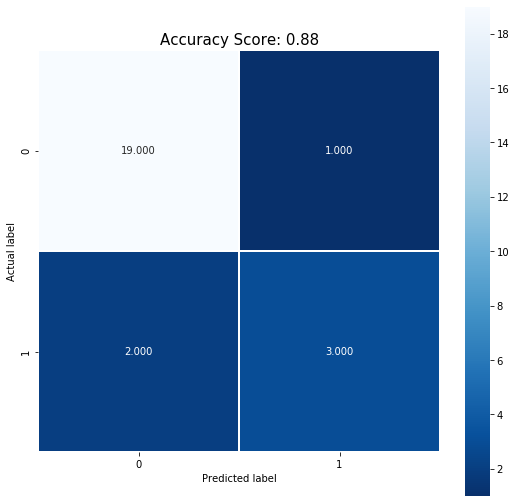

In [42]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);